# Assignment 

### Import

In [249]:
import os
import csv
import json
import pymongo
import requests
import numpy as np
import pandas as pd
from tqdm import tqdm 
from collections import OrderedDict,Counter
import pickle
from scipy.stats import bernoulli
import datetime
import random
import pygsheets
import warnings
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.pyplot import figure
warnings.filterwarnings("ignore")

import keras
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score,\
confusion_matrix, plot_confusion_matrix, classification_report, plot_roc_curve, accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Load Lead conversion Data set

In [7]:
data_df = pd.read_csv('../data/training_set.csv')
data_df = data_df.drop('Unnamed: 0', axis=1)
print(data_df.shape)
data_df.head()

(3910, 58)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


- Check for the missing values

### EDA

In [16]:
# Check for data disctributions

data_df.describe(np.arange(0, 1.1, 0.1))

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.148000,3.000000,11.000000,0.000000
20%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.461000,5.000000,25.000000,0.000000
30%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.714000,8.000000,44.000000,0.000000
40%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.983000,11.000000,67.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000


- Key obervations from the above tables

1. Few columns has very sparsed data. More than 70-80% rows has no values. i.e Column X4, X1, X7, X31
2. While few columns have a fair distribution of non-zero values but those are very skewed distribution i.e X56, X57 columns
3. Also different data columns are on different sacles like columns X51 is between 0 to 2.78 while X57 is between 1 to ~10k


#### Univariant Analysis

In [90]:
# check for the unique values in the all 57 columns

for col in range(data_df.shape[1]-1):
    
    num = len(np.unique(data_df.iloc[:, col]))
    percentage = float(num) * 100 / data_df.shape[0] 
    print('%d, %d, %.1f%%' % (col+1, num, round(percentage, 2)))


- As we can see few columns has very low number of unique values like columns X4 and X47. 

In [46]:
from sklearn.feature_selection import VarianceThreshold

In [61]:
results = list()
thresholds = np.arange(0.0, 0.55, 0.05)
for t in thresholds:
    
    # Perform Variance Thesholding
    transform = VarianceThreshold(threshold=t)
    X_sel = transform.fit_transform(data_df)
    
    # Determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    
    # store the result
    results.append(n_features)

>Threshold=0.00, Features=58
>Threshold=0.05, Features=54
>Threshold=0.10, Features=43
>Threshold=0.15, Features=38
>Threshold=0.20, Features=29
>Threshold=0.25, Features=26
>Threshold=0.30, Features=22
>Threshold=0.35, Features=21
>Threshold=0.40, Features=20
>Threshold=0.45, Features=17
>Threshold=0.50, Features=17


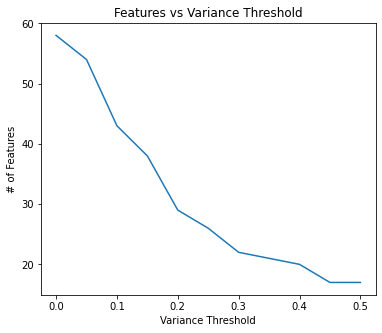

In [62]:
fig = figure(figsize=(6, 5))
plt.title('Features vs Variance Threshold')
plt.xlabel('Variance Threshold')
plt.ylabel('# of Features')
plt.plot(thresholds, results)
plt.show()

- As we can see only 17 columns has high variance as compared to the rest 

#### Bi-variant Analysis

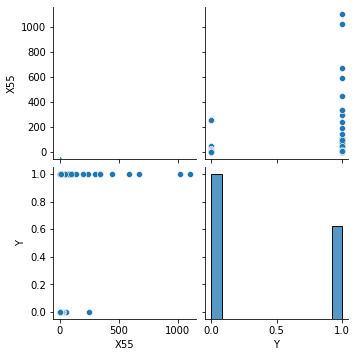

In [95]:
sns.pairplot(data_df[['X55', 'Y']])

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [272]:
X = data_df.drop('Y', axis=1)
Y = data_df['Y']
print(X.shape, Y.shape)

(3910, 57) (3910,)


In [68]:
fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(X, Y)
# transform train input data
X_featured = fs.transform(X)

print(X_featured.shape)

(3910, 57)


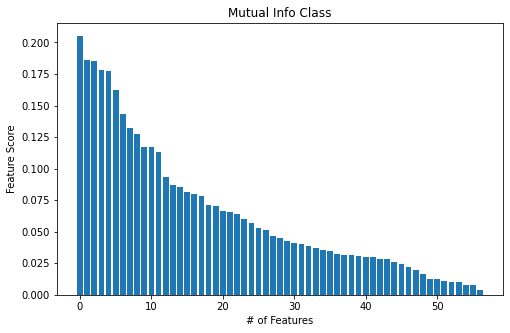

In [89]:
fig = figure(figsize=(8, 5))
plt.title('Mutual Info Class')
plt.ylabel('Feature Score')
plt.xlabel('# of Features')
plt.bar([i for i in range(len(fs.scores_))], sorted(fs.scores_, reverse=True))
plt.show()

- As we can see after feature 25 feature score becomes the almost constant (relative change becomes negligible)

- Check for class disctribution

In [10]:
data_df['Y'].value_counts()

0    2376
1    1534
Name: Y, dtype: int64

- Here we have uneven distribution of samples in both the classes 

In [253]:
from imblearn.over_sampling import SMOTE

In [280]:
os_method = SMOTE()
os_method.fit(X, Y)

print('Before Over Sampling ')
print(Counter(Y))
X, Y = os_method.fit_resample(X, Y)
print(Counter(Y))

Before Over Sampling 
Counter({0: 2376, 1: 1534})
Counter({0: 2376, 1: 2376})


#### Prepare the dataset

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=1234)
print('training data points : ', X_train.shape[0])
print('validation data points : ', X_test.shape[0])

training data points :  3128
validation data points :  782


### Training Classification Models

#### 1. Random Forest Classifier

In [289]:
# Train RandomForest Classifier
rf_model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=500, n_jobs=-1, 
                       oob_score=True,
                       random_state=42)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

#### 2. XGBosst

In [274]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

[03:16:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### 3. SVM

In [183]:
from sklearn import svm

In [209]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=0.5).fit(X_train, y_train)

In [192]:
y_pred = svc.predict(X_test)

In [195]:
y_pred_prob = svc.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC Score : ', auc)

AUC Score :  0.9405073221757323


In [206]:
y_pred_class_train = svc.predict(X_train)
y_pred_class = svc.predict(X_test)

print('Training Accuracy : ', round(accuracy_score(y_train, y_pred_class_train), 5))
print('Testing Accuracy : ', round(accuracy_score(y_test, y_pred_class), 5))


Training Accuracy :  0.74329
Testing Accuracy :  0.74936


#### 4. XGBoost (with Selected Features)

In [281]:
def select_features(X_train, y_train, X_test, k):
    
    # Selects best K features
    fs = SelectKBest(score_func=mutual_info_classif, k=k)
    
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [282]:
total_best_features = 32
X_train_fs, X_test_fs, __ = select_features(X_train, y_train, X_test, total_best_features)

In [283]:
xgb_model_fs = XGBClassifier()
xgb_model_fs.fit(X_train_fs, y_train)

[03:17:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Evaluate the Metrics (ROC, Accuracy, F1 Score)

### A. Model : Random Forest

#### 1. Confusion Matrix

Training Accuracy :  0.99936
Testing Accuracy :  0.95908


<AxesSubplot:>

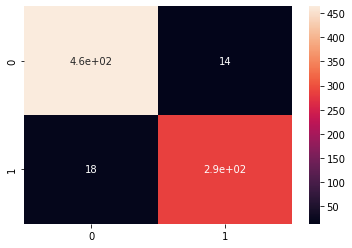

In [198]:
# Predict the class
y_pred_class_train = rf_model.predict(X_train)
y_pred_class = rf_model.predict(X_test)

print('Training Accuracy : ', round(accuracy_score(y_train, y_pred_class_train), 5))
print('Testing Accuracy : ', round(accuracy_score(y_test, y_pred_class), 5))
cnf_mtx = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cnf_mtx, annot=True)

#### 2. ROC

In [153]:
y_pred_prob = rf_model.predict_proba(X_test)
y_pred_prob = np.array([x[0] for x in y_pred_prob])

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

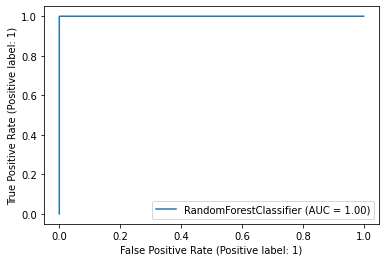

In [154]:
plot_roc_curve(rf_model, X_train, y_train)

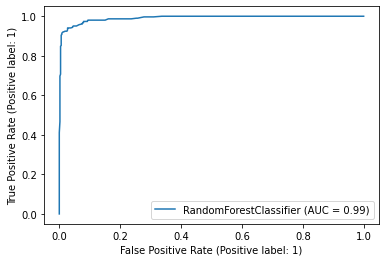

In [155]:
plot_roc_curve(rf_model, X_test, y_test)

In [181]:
y_pred_prob = rf_model.predict_proba(X_test)
y_pred_prob = np.array([ x[1] for x in y_pred_prob])
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC Score : ', auc)

AUC Score :  0.9905031931292667


#### 3. Classfication Report

In [156]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       478
           1       0.95      0.94      0.95       304

    accuracy                           0.96       782
   macro avg       0.96      0.96      0.96       782
weighted avg       0.96      0.96      0.96       782



### B. Model : XGBoost

#### 1. Confusion Matrix

Training Accuracy :  0.99808
Testing Accuracy :  0.96036


<AxesSubplot:>

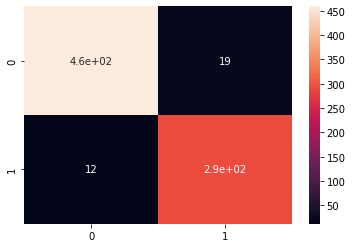

In [275]:
# Predict the class
y_pred_class_train = xgb_model.predict(X_train)
y_pred_class = xgb_model.predict(X_test)

print('Training Accuracy : ', round(accuracy_score(y_train, y_pred_class_train), 5))
print('Testing Accuracy : ', round(accuracy_score(y_test, y_pred_class), 5))
cnf_mtx = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cnf_mtx, annot=True)

#### 2. ROC

In [276]:
y_pred_prob = xgb_model.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

print('AUC score : ', roc_auc_score(y_test, y_pred_prob))

AUC score :  0.989484695001101


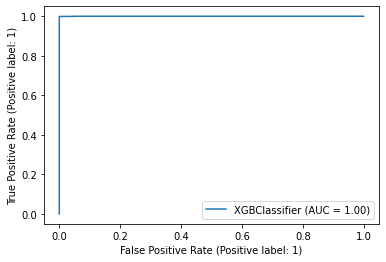

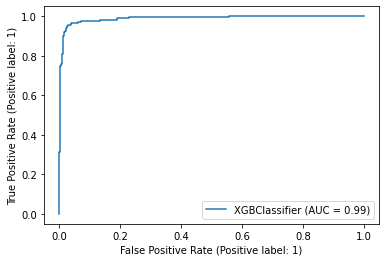

In [277]:
# Plot ROC on validation data
plot_roc_curve(xgb_model, X_train, y_train)
plot_roc_curve(xgb_model, X_test, y_test)

#### 3. Classfication Report

In [166]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       478
           1       0.94      0.96      0.95       304

    accuracy                           0.96       782
   macro avg       0.96      0.96      0.96       782
weighted avg       0.96      0.96      0.96       782



### C. XGBoost (selected features)

#### 1. Confusion Matrix

Training Accuracy :  0.99808
Testing Accuracy :  0.95524


<AxesSubplot:>

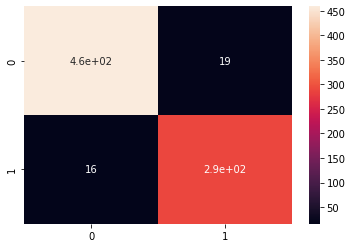

In [284]:
# Predict the class
y_pred_class_train = xgb_model_fs.predict(X_train_fs)
y_pred_class = xgb_model_fs.predict(X_test_fs)

print('Training Accuracy : ', round(accuracy_score(y_train, y_pred_class_train), 5))
print('Testing Accuracy : ', round(accuracy_score(y_test, y_pred_class), 5))
cnf_mtx = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cnf_mtx, annot=True)

#### 2. ROC

In [286]:
y_pred_prob = xgb_model_fs.predict_proba(X_test_fs)
y_pred_prob = y_pred_prob[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
print('ROC-AUC score : ', roc_auc_score(y_test, y_pred_prob))

ROC-AUC score :  0.9878261946707774


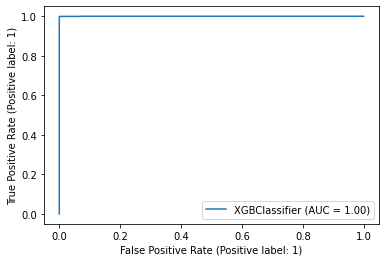

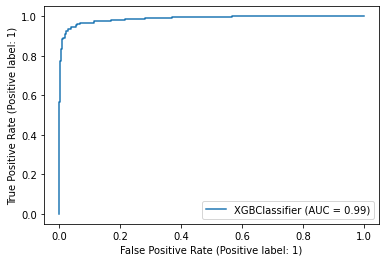

In [287]:
# Plot ROC on validation data
plot_roc_curve(xgb_model_fs, X_train_fs, y_train)
plot_roc_curve(xgb_model_fs, X_test_fs, y_test)

#### 3. Classfication Report

In [288]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       478
           1       0.94      0.95      0.94       304

    accuracy                           0.96       782
   macro avg       0.95      0.95      0.95       782
weighted avg       0.96      0.96      0.96       782



## Explainability

#### 1. check the feature splits of decision tree from random forest

In [222]:
from sklearn.tree import plot_tree
plt.figure(figsize=(180,140))
plot_tree(rf_model.estimators_[1], feature_names = X_train.columns,class_names=['Positive', "Negative"],filled=True);


#### 2. Check the marginal contribution of each feature using SHAP values

In [190]:
import shap 
explainer = shap.TreeExplainer(rf_model)
choosen_instance = X_train.iloc[16]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [191]:
# Actual prediction 
y_train.iloc[16]

0

#### 3. Feature Importance

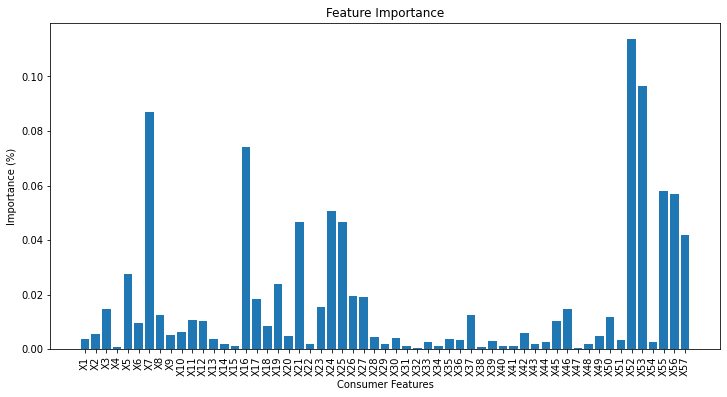

In [245]:
importance = rf_model.feature_importances_

input_cols = list(X.columns)
# for i,v in enumerate(importance):
#     print('Feature: %s, Score: %.5f' % (input_cols[i],v))
fig = figure(figsize=(12, 6))
plt.xticks(ticks=[x for x in range(len(input_cols))],labels=input_cols, rotation=90)
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance')
plt.xlabel('Consumer Features')
plt.ylabel('Importance (%)')
plt.show()

### Prediction for given Test dataset 

In [231]:
test_data_df = pd.read_csv('../data/test_set.csv')
test_data_df = test_data_df.drop('Unnamed: 0', axis=1)
print(test_data_df.shape)
test_data_df.head()

(691, 57)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


- Perform the prediction

In [233]:
# Predict Class Lable
y_pred_class = xgb_model.predict(test_data_df) 

# Predict Class Probability
y_pred_prob = xgb_model.predict_proba(test_data_df) 

In [236]:
# Assign predicted class
test_data_df['Y_class_pred'] = y_pred_class

# Assign predicted class probability
test_data_df['Y_class_probability'] = y_pred_prob[:, 0]

In [237]:
# Save the submissions 
test_data_df.to_csv('../data/test_data_sumission.csv', index=False, header=True)